In [2]:
from point_impl import Point

In [3]:
def gen_id(x, y):
    return (x + y) * (x + y + 1) // 2 + y

In [24]:
class Node:
    def __init__(self, value, data=''):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1
        self.data = data

class AVLTree:
    def __init__(self, data=None):
        self.root = None
        if data != None:
            self.insert(data)

    def height(self, node):
        if not node:
            return 0
        return node.height

    def balance(self, node):
        if not node:
            return 0
        return self.height(node.left) - self.height(node.right)

    def insert_value(self, root, value, data):
        if not root:
            return Node(value, data)
        elif value < root.value:
            root.left = self.insert_value(root.left, value, data)
        else:
            root.right = self.insert_value(root.right, value, data)

        root.height = 1 + max(self.height(root.left), self.height(root.right))
        balance = self.balance(root)

        # Left rotation
        if balance > 1 and value < root.left.value:
            return self.right_rotate(root)

        # Right rotation
        if balance < -1 and value > root.right.value:
            return self.left_rotate(root)

        # Left-Right rotation
        if balance > 1 and value > root.left.value:
            root.left = self.left_rotate(root.left)
            return self.right_rotate(root)

        # Right-Left rotation
        if balance < -1 and value < root.right.value:
            root.right = self.right_rotate(root.right)
            return self.left_rotate(root)

        return root

    def delete(self, root, value):
        if not root:
            return root

        if value < root.value:
            root.left = self.delete(root.left, value)
        elif value > root.value:
            root.right = self.delete(root.right, value)
        else:
            if not root.left:
                temp = root.right
                root = None
                return temp
            elif not root.right:
                temp = root.left
                root = None
                return temp

            temp = self.min_value_node(root.right)
            root.value = temp.value
            root.right = self.delete(root.right, temp.value)

        if not root:
            return root

        root.height = 1 + max(self.height(root.left), self.height(root.right))
        balance = self.balance(root)

        # Left rotation
        if balance > 1 and self.balance(root.left) >= 0:
            return self.right_rotate(root)

        # Right rotation
        if balance < -1 and self.balance(root.right) <= 0:
            return self.left_rotate(root)

        # Left-Right rotation
        if balance > 1 and self.balance(root.left) < 0:
            root.left = self.left_rotate(root.left)
            return self.right_rotate(root)

        # Right-Left rotation
        if balance < -1 and self.balance(root.right) > 0:
            root.right = self.right_rotate(root.right)
            return self.left_rotate(root)

        return root

    def left_rotate(self, z):
        y = z.right
        T2 = y.left

        y.left = z
        z.right = T2

        z.height = 1 + max(self.height(z.left), self.height(z.right))
        y.height = 1 + max(self.height(y.left), self.height(y.right))

        return y

    def right_rotate(self, z):
        y = z.left
        T3 = y.right

        y.right = z
        z.left = T3

        z.height = 1 + max(self.height(z.left), self.height(z.right))
        y.height = 1 + max(self.height(y.left), self.height(y.right))

        return y

    def min_value_node(self, root):
        current = root
        while current.left:
            current = current.left
        return current

    def find_value(self, root, value):
        if not root or root.value == value:
            return root
        if root.value < value:
            return self.find_value(root.right, value)
        return self.find_value(root.left, value)

    def insert_el(self, value, data=''):
        self.root = self.insert_value(self.root, value, data)

    def insert(self, els):
        for i in els:
            self.insert_el(gen_id(i.x, i.y), i)
    
    def delete_value(self, value):
        self.root = self.delete(self.root, value)

    def find(self, value):
        return self.find_value(self.root, value)

    def __contains__(self, item):
        return True if self.find(gen_id(item.x, item.y)) != None else False

    def find_length(self, root):
        if not root:
            return 0
        return 1 + self.find_length(root.left) + self.find_length(root.right)
    
    def __len__(self):
        return self.find_length(self.root)

In [25]:
tr = AVLTree()

In [26]:
tr

In [27]:
tr.insert([Point(5, 5), Point(5, 8), Point(5, 7)])

In [28]:
x = tr.find(gen_id(5, 5))
if x is None: print(0)

In [29]:
len(tr)

3

In [30]:
Point(5, 8) in tr

True

In [31]:
f = Point(5, 8)

In [32]:
tr.delete_value(gen_id(f.x, f.y))

In [33]:
Point(5, 8) in tr

False

In [34]:
len(tr)

2

In [35]:
import numpy as np

In [36]:
import matplotlib.pyplot as plt

In [37]:
import timeit
import math
import random

In [44]:
plt.rcParams['figure.figsize'] = [10, 6]

def perform_bench(type_of_bench):
    if type_of_bench == 'insert':
        ns = np.linspace(0, 100_000, 10, dtype=int)
        ts = [timeit.timeit('tr.insert([Point({}, {})])'.format(n, n + 1), 
                            setup='tr = AVLTree([Point(i, i + 1) for i in range({})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    elif type_of_bench == 'delete':
        ns = np.linspace(0, 100_000, 10, dtype=int)
        ts = [timeit.timeit('tr.delete_value(gen_id(Point({}, {}).x, Point({}, {}).y))'.format(n - 2, n - 1, n - 2, n - 1), 
                            setup='tr = AVLTree([Point(i, i + 1) for i in range({})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    elif type_of_bench == 'find':
        ns = np.linspace(0, 100_000, 10, dtype=int)
        ts = [timeit.timeit('tr.find(gen_id(0, 1))'.format(''), 
                            setup='tr = AVLTree([Point(i, i + 1) for i in range({})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    elif type_of_bench == 'contains':
        ns = np.linspace(0, 100_000, 10, dtype=int)
        ts = [timeit.timeit('Point(0, 1) in tr'.format(''), 
                            setup='tr = AVLTree([Point(i, i + 1) for i in range({})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    
    plt.plot(ns, ts, 'or')
    
    degree = 4
    coeffs = np.polyfit(ns, ts, degree)
    p = np.poly1d(coeffs)
    plt.plot(ns, [p(n) for n in ns], '-b')

In [1]:
perform_bench('insert')

NameError: name 'perform_bench' is not defined

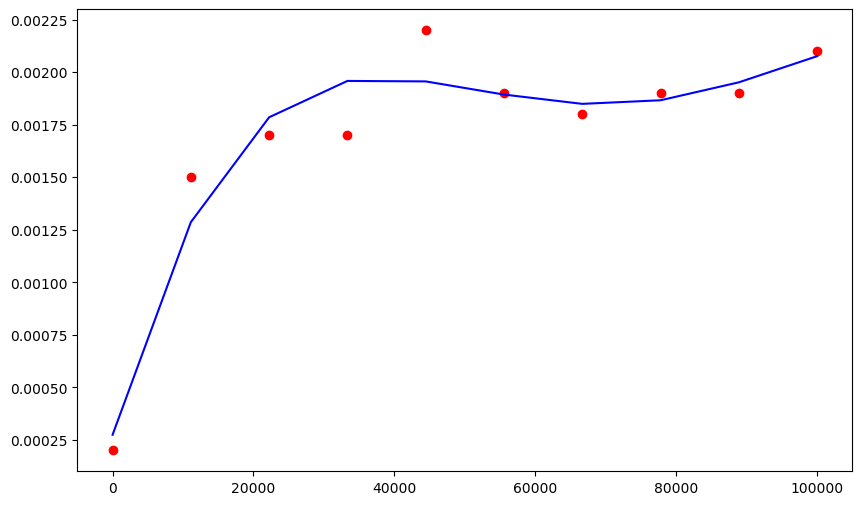

In [45]:
perform_bench('find')

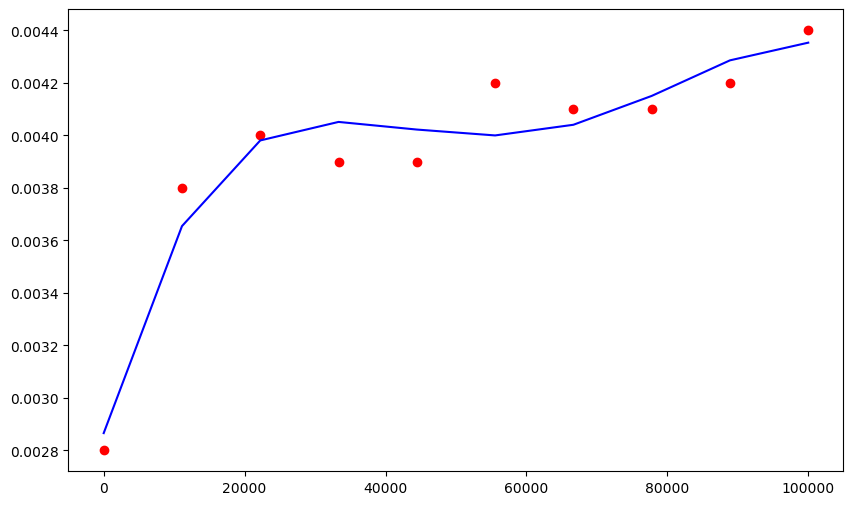

In [46]:
perform_bench('contains')

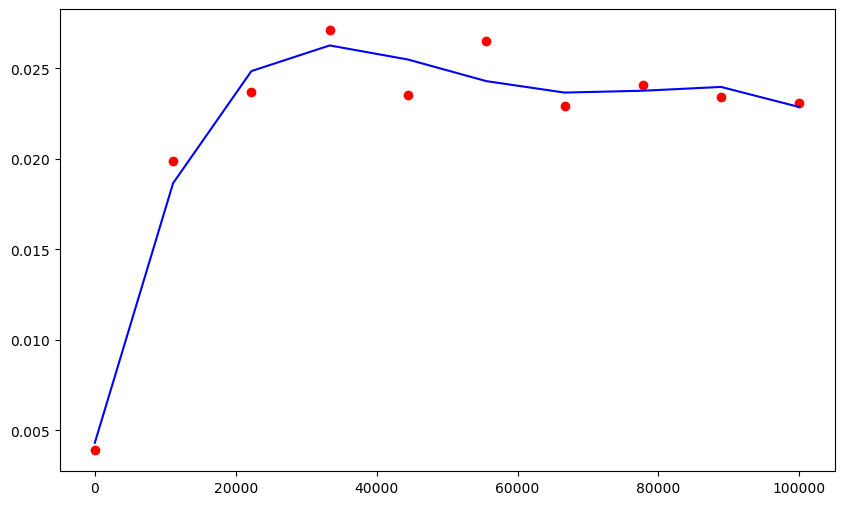

In [47]:
perform_bench('delete')